In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import zipfile
import os

In [88]:
iris_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

iris_df = pd.read_csv(iris_data, names=names)
iris_df

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


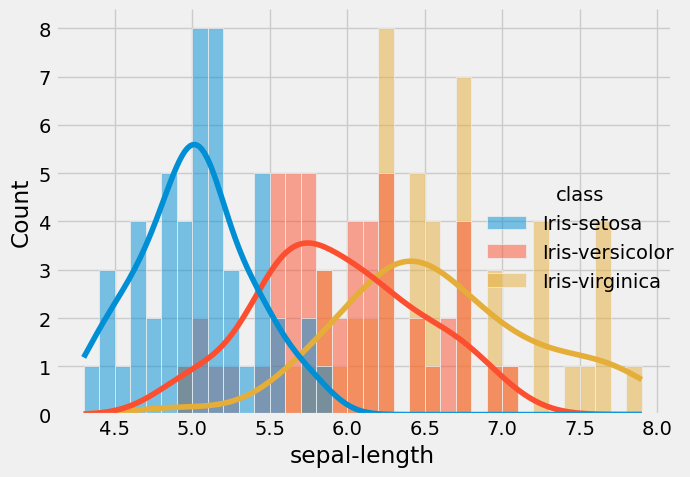

In [89]:
sns.displot(
    data=iris_df,
    x='sepal-length',
    kind='hist',
    bins=int(180/5),
    kde=True,
    # fill=True,
    hue='class'
)
plt.tight_layout();


### Variance

In [90]:
round(iris_df['sepal-length'].var(), 2)

0.69

In [91]:
round(iris_df['sepal-length'].std(), 2)

0.83

In [92]:
round(iris_df['sepal-length'].mean(), 2)

5.84

In [93]:
var_coef = iris_df['sepal-length'].std() / iris_df['sepal-length'].mean()
var_coef

0.14171125977944032

### Simple random sampling

In [289]:
simple_random = iris_df.sample(frac=0.5)
simple_random.head()

,sepal_length,sepal_width,petal_length,petal_width,species
109,7.2,3.6,6.1,2.5,virginica
0,5.1,3.5,1.4,0.2,setosa
23,5.1,3.3,1.7,0.5,setosa
55,5.7,2.8,4.5,1.3,versicolor
33,5.5,4.2,1.4,0.2,setosa


In [95]:
simple_random['sepal-length'].var(numeric_only=True)

0.6168216216216215

In [96]:
simple_random['sepal-length'].std(numeric_only=True)

0.785379921835045

In [97]:
var_coef = simple_random['sepal-length'].std() / simple_random['sepal-length'].mean()
var_coef

0.1367304877846527

### Summarize variance in a table for iris numerical values.

In [98]:
import janitor

In [99]:
stats = {
    'columns': iris_df.select_dtypes('float').clean_names(case_type='snake').columns,
    'variance' : iris_df.select_dtypes('float').sample(frac=0.5).var().to_list(),
    'std' : iris_df.select_dtypes('float').sample(frac=0.5).std().to_list(),
    'var_coef' : lambda df : df.var() / df.mean()
}

stats['var_coef'] = stats['var_coef'](iris_df.select_dtypes('float').sample(frac=0.5)).to_list()

In [100]:
simple_random_stats = pd.DataFrame(stats)
simple_random_stats

,columns,variance,std,var_coef
0,sepal_length,0.638108,0.810294,0.111772
1,sepal_width,0.169719,0.405480,0.050685
2,petal_length,2.833993,1.774548,0.775876
3,petal_width,0.533993,0.788460,0.479826


### Confidence interval

$$
CI = \bar{x} \pm \ z\cdot\frac{s}{\sqrt{n}}
$$

$$
\bar{x}-z\cdot\frac{s}{\sqrt{n}}<\bar{x}<\bar{x}+z\cdot\frac{s}{\sqrt{n}}
$$

The Z value is read from a table in which the z-values for the respective confidence level are plotted. For the **confidence level** of **95%**, i.e., the **z-value** is **1.96**.

$$
CI = \bar{x} \pm \ 1.96\cdot\frac{s}{\sqrt{n}}
$$

Let's suppose we have the following distribution:

In [101]:
np.random.seed(20)
var_1 = np.random.randint(0, 10, 10)
var_2 = var_1 + np.random.normal(0, 1, 10)

In [102]:
var_1, var_2

(array([3, 9, 4, 6, 7, 2, 0, 6, 8, 5]),
 array([1.91516741, 9.55969629, 4.93946935, 5.02151896, 7.50309684,
        2.40641447, 0.32346101, 5.50658912, 7.20798321, 4.15763207]))

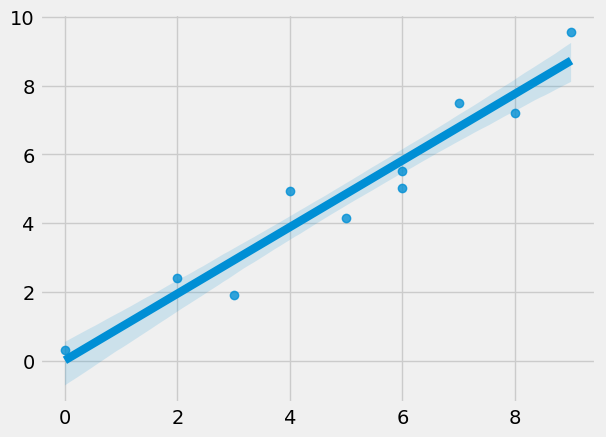

In [103]:
sns.regplot(x=var_1, y=var_2, ci=80);

In [104]:
vacations = pd.DataFrame(list(zip(var_1, var_2)), columns=['vacation_days', 'spent_money'])
vacations

,vacation_days,spent_money
0,3,1.915167
1,9,9.559696
2,4,4.939469
3,6,5.021519
4,7,7.503097
5,2,2.406414
6,0,0.323461
7,6,5.506589
8,8,7.207983
9,5,4.157632


Confidence interval using t-student due to data size is below 30, len(df) < 30.

In [105]:
st.t.interval(df=len(vacations)-1, loc=np.mean(vacations), scale=st.sem(vacations), confidence=0.95)

/home/fenilenvinileno97/miniconda3/envs/missing_values/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(array([3.00496491, 2.84767315]), array([6.99503509, 6.86053259]))

$$
\bar{var_1}-2.85<\bar{var_1}<\bar{var_1}+3.00
$$

$$
\bar{var_2}-6.86<\bar{var_2}<\bar{var_2}+6.99
$$

### ***Hypothesis tests***

In [106]:
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [107]:
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Type of tests

**a. t-student distribution.**

$$
SE = \frac{\sigma}{\sqrt{N}}
$$

In [108]:
se_sepal_length = iris_df['sepal_length'].std() / np.sqrt(10)
se_sepal_width = iris_df['sepal_width'].std() / np.sqrt(10)

$$
SED = \sqrt{\frac{{\sigma_1}^2}{N_1} + \frac{{\sigma_2}^2}{N_1}}
$$

In [109]:
sed = np.sqrt((se_sepal_length**2)+(se_sepal_width**2))
sed

0.2959177133340904

### `t-student`

$$
t = \frac{(x_1-x_2)}{\sqrt{\frac{(s_1)^2}{N_1}+\frac{(s_2)^2}{N_2}}}
$$

$$
t = \frac{(x_1-x_2)}{SED}
$$

In [110]:
t_stat = (iris_df.sepal_length.mean() - iris_df.sepal_width.mean()) / sed
t_stat

9.414779428410265

In [111]:
p = ttest_ind(iris_df.sepal_length, iris_df.sepal_width)
p

TtestResult(statistic=36.463283934449116, pvalue=7.027919392009369e-112, df=298.0)

### Z-value testing.

In [112]:
from scipy.stats import norm

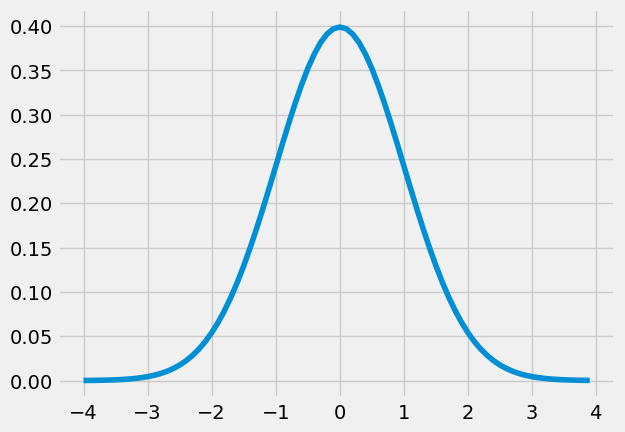

In [113]:
x_axis = np.arange(-4, 4, 0.1)
plt.plot(x_axis, norm.pdf(x_axis, 0, 1))
plt.show();

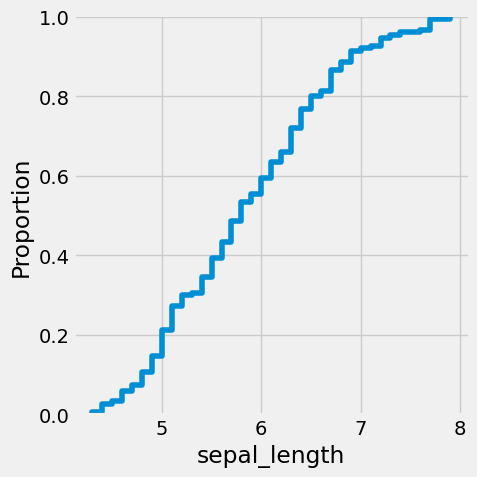

In [114]:
sns.displot(
    data=iris_df.sepal_length,
    kind='ecdf'
);

In [115]:
sepal_length_mean = round(iris_df.sepal_length.mean(), 3)
sepal_length_std = round(iris_df.sepal_length.std(), 3)
print(sepal_length_mean, sepal_length_std)

5.843 0.828


In [116]:
st.norm.cdf((4.5-sepal_length_mean)/sepal_length_std)

0.05240374286136116

### Pearson and ANOVA testing.

In [117]:
iris_df.sepal_length.corr(iris_df.sepal_width)

-0.11756978413300208

In [118]:
st.pearsonr(iris_df.sepal_length, iris_df.sepal_width)

PearsonRResult(statistic=-0.11756978413300205, pvalue=0.15189826071144746)

In [119]:
f_oneway(iris_df.sepal_length, iris_df.sepal_width)

F_onewayResult(statistic=1329.571075284254, pvalue=7.027919392009998e-112)

---

#### Practice 1: Federal Firearm Licenses

Our objective in this first practice is to cast a hypothesis test for sold firearms by county mean, and use p-values through (t-student) test.

In [164]:
!kaggle datasets download -d doj/federal-firearm-licensees/

100%|██████████████████████████████████████| 3.43M/3.43M [00:01<00:00, 1.93MB/s]
100%|██████████████████████████████████████| 3.43M/3.43M [00:01<00:00, 1.89MB/s]


In [167]:
# Creating unzipping directory.
zip_firearm_path = './federal-firearm-licensees.zip'
extracted_firearm_path = './federal_firearm_licensees'
os.makedirs(extracted_firearm_path, exist_ok=True)

In [168]:
with zipfile.ZipFile(zip_firearm_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_firearm_path)

In [237]:
firearm_df = pd.read_csv("federal_firearm_licensees/data.csv", index_col=0, low_memory=False).iloc[1:, :].clean_names(case_type='snake')
firearm_df.head(2)

,lic_regn,lic_dist,lic_cnty,lic_type,lic_xprdte,lic_seqn,license_name,business_name,premise_street,premise_city,premise_state,premise_zip_code,mail_street,mail_city,mail_state,mail_zip_code,voice_phone
1,1,66,003,01,7L,00150,"SALAZAR-MORET, CHARLES",AGUADA SPORT SHOP & ARMORY,BO ASOMANTE CARR 115 KM 24-5,AGUADA,PR,00602,CALLE COLON #4 SUITE 3,AGUADA,PR,00602,7878686682
2,1,66,003,01,8F,00258,"HERNANDEZ-MUNOZ, GILBERTO",ARMERIA Y ACCESORIOS EL NARANJAL,CARR 411 KM 1.0 BO GUAYABO SECTOR BAJURA,AGUADA,PR,00602,4 REPTO MINERVA,AGUADA,PR,00602,7878680125


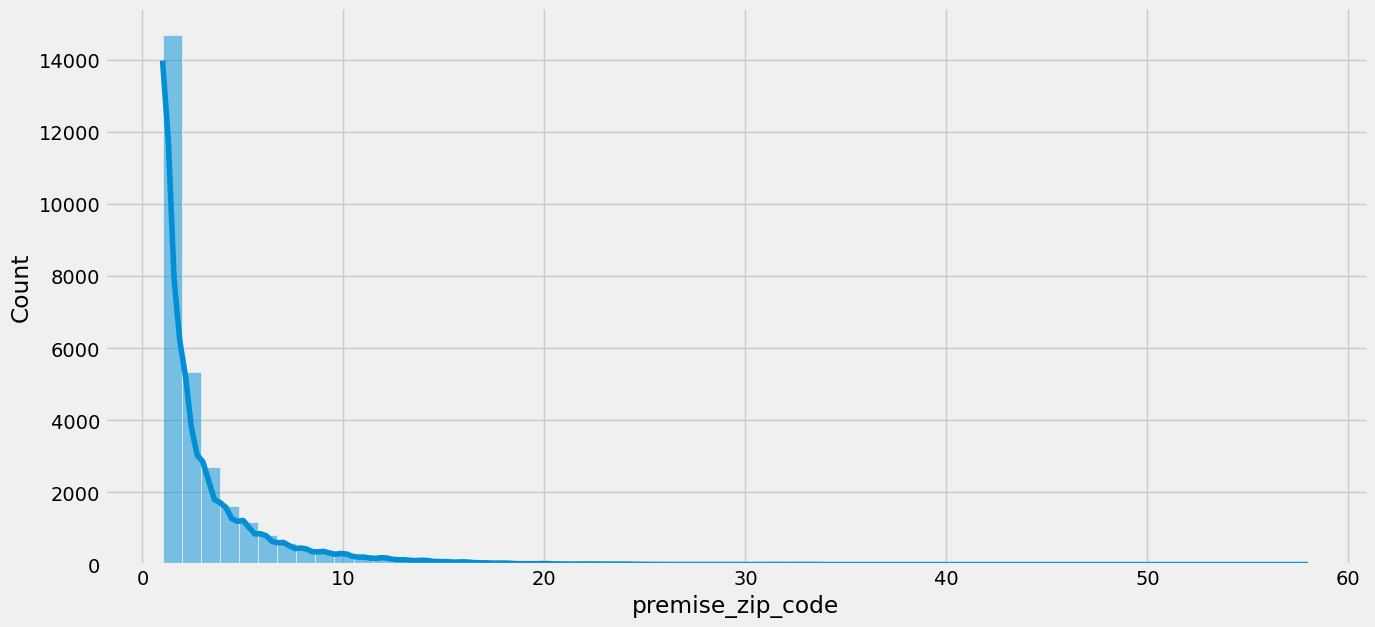

In [238]:
sns.displot(
    data=firearm_df['premise_zip_code'].value_counts(), 
    kind='hist',
    bins=60,
    kde=True,
    height=6.5, 
    aspect=2.15
    );

In [286]:
print(f"{firearm_df.premise_zip_code.value_counts().mean():.6f}")

2.756678


This distribution is one-sided and not adjustable to a normal distribution, so the use of a *t-student* statistic as *p-value* could be a relevant strategy to cast a hypothesis test as:

$$
Hypothesis \ test \ =
    \begin{cases}
        H_{0} \neq 2.75 \\
        H_{a} = 2.75
    \end{cases}
$$


Considering a significance level $\alpha = 0.05$, we can state our t-student test and confirm if $H_{0}$ is valid:
$$
SE = \frac{\sigma}{\sqrt{N}}
$$

$$
t = \frac{(x_1-x_2)}{SE}
$$

In [240]:
def t_value(X, h_0):
    se = np.sqrt(np.var(X) / len(X))
    return (np.mean(X) - h_0) / se

def p_value(t):
    # Two-sided p-value, so we multiply by 2.
    return st.norm.sf(abs(t))*2

In [283]:
X_firearm = firearm_df.premise_zip_code.value_counts()
t = t_value(X_firearm, 2.75)
p = p_value(t)

In [284]:
t,p

(0.3602713469802255, 0.7186442244499638)

We can note that **p value** > **t test**, therefore, we can reject $H_{0}$ with a 95% of confidence and state that $\mu = 2.75$, this means that each country has about 3 firearms in average.

In [287]:
st.ttest_1samp(a=X_firearm, popmean=2.75)

TtestResult(statistic=0.36026515435690487, pvalue=0.718651470754852, df=29088)

---

### Bootstrapping

It's a resampling method involving **random variable**, commonly used to determine and approximate a normal distribution. This is a really useful method for small or highly biased samples.

In [243]:
import random

In [244]:
data = np.random.normal(loc=34, size=10000)
print("Mean of this data distribution is {}".format(data.mean()))

Mean of this data distribution is 34.024537457043564


In [245]:
av_data = []
for i in range(40):
    sample = random.sample(data.tolist(), 5)
    mean = np.mean(sample)
    av_data.append(mean)

In [246]:
np.mean(av_data)

33.94796935304284

---

#### Practice 2: Suicide rate in veterans across US
Let's craft a quick analysis using a sobering dataset from suicide rate in veterans developed in 2005

In [247]:
!kaggle datasets download -d residentmario/us-veteran-suicides

us-veteran-suicides.zip: Skipping, found more recently modified local copy (use --force to force download)


In [248]:
zip_file_path = 'us-veteran-suicides.zip'
extracted_dir_path = 'us_veteran_data'
os.makedirs(extracted_dir_path, exist_ok=True)

In [249]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

In [250]:
vet_2005 = pd.read_csv("us_veteran_data/2005.csv", index_col=0)
vet_2005.head()

,state,vet_pop,overall_pop_18,vet_pop_p,vet_suicides,all_suicides,vet_suicides_p,vet_males,vet_males_p,vet_females,...,vet_40_49,vet_35-54,vet_45_54,vet_50_59,vet_45_64,vet_55_64,vet_60,vet_65,vet_rate,civ_rate
0,Alabama,403950,3344721,0.120772,135,535,0.252336,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.419978,13.601875
1,Alaska,74482,446969,0.166638,24,131,0.183206,22.0,0.916667,2.0,...,NaN,NaN,9.0,NaN,NaN,5.0,NaN,4.0,32.222550,28.725835
2,Arizona,538880,4238996,0.127124,225,945,0.238095,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.753266,19.458849
3,Arkansas,259304,2023819,0.128126,81,400,0.202500,79.0,0.975309,2.0,...,NaN,NaN,NaN,NaN,NaN,16.0,NaN,25.0,31.237466,18.078622
4,California,2193336,25543447,0.085867,633,3206,0.197442,613.0,0.968404,20.0,...,NaN,NaN,NaN,NaN,220.0,NaN,NaN,317.0,28.860147,11.019220


In [251]:
vet_2005.columns

Index(['state', 'vet_pop', 'overall_pop_18', 'vet_pop_p', 'vet_suicides',
       'all_suicides', 'vet_suicides_p', 'vet_males', 'vet_males_p',
       'vet_females', 'vet_females_p', 'vet_15_24', 'vet_18_29', 'vet_17_34',
       'vet_25_34', 'vet_30_39', 'vet_25_44', 'vet_35_44', 'vet_40_49',
       'vet_35-54', 'vet_45_54', 'vet_50_59', 'vet_45_64', 'vet_55_64',
       'vet_60', 'vet_65', 'vet_rate', 'civ_rate'],
      dtype='object')

In [252]:
vet_2005_suic = (
    vet_2005
    .assign(
        rate_vet = lambda df: df.vet_suicides / df.vet_pop,
        rate_nonvet = lambda df: (df.all_suicides - df.vet_suicides)/ df.overall_pop_18
        
    )
    .select_columns("state", "rate_nonvet", "rate_vet")
)

vet_2005_suic.head()


,state,rate_nonvet,rate_vet
0,Alabama,0.000120,0.000334
1,Alaska,0.000239,0.000322
2,Arizona,0.000170,0.000418
3,Arkansas,0.000158,0.000312
4,California,0.000101,0.000289


In [253]:
print(f"The size of our df is particularly small:{vet_2005_suic.shape}, only having 50 rows of data to extend for a global population.")

The size of our df is particularly small:(50, 3), only having 50 rows of data to extend for a global population.


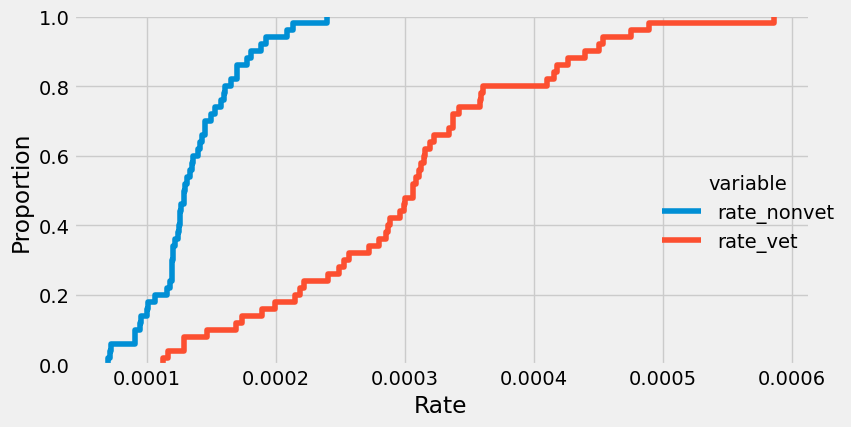

In [254]:
ax = sns.displot(
    data=vet_2005_suic.melt(id_vars='state', value_vars=['rate_nonvet', 'rate_vet']), 
    x="value", 
    kind="ecdf",
    hue="variable", 
    height=4.5, 
    aspect=1.5
    )
plt.tight_layout()
plt.xlabel(r"Rate")
plt.show()


In [255]:
def confidence_interval(X, c) -> np.array:
    mu = np.mean(X)
    z_score = st.norm.ppf(1- ((1 -c) / 2))
    sqrt_n = np.sqrt(len(X))
    std_dev = np.std(X)
    
    alpha = z_score * (std_dev / sqrt_n)
    return np.array([mu - alpha, mu + alpha])

In [256]:
# 
confidence_interval(vet_2005_suic.rate_vet, 0.95)*1000000, confidence_interval(vet_2005_suic.rate_nonvet, 0.95)*1000000

(array([274.2230615 , 331.08208293]), array([125.86551662, 145.64954861]))

In [257]:
# Repeating bootstrap for 20 randomly chosen elements along 10000 cycles.
draws = np.array([np.random.choice(vet_2005_suic.rate_nonvet, size=20) for _ in range(10000)]) * 1000000
nonvet_means = np.array([np.mean(draw) for draw in draws])

draws = np.array([np.random.choice(vet_2005_suic.rate_vet, size=20) for _ in range(10000)]) * 1000000
vet_means = np.array([np.mean(draw) for draw in draws])

del draws

In [258]:
def retrieve_data(data) -> tuple:
    kde_data = sns.histplot(data=pd.Series(data), kde=True, stat='count').get_lines()[0].get_data()
    x_max, y_max = kde_data[0][np.argmax(kde_data[1])], np.max(kde_data[1])
    plt.close();
    return x_max, y_max

In [259]:
x_max, y_max = retrieve_data(nonvet_means)
x_max_vet, y_max_vet = retrieve_data(vet_means)

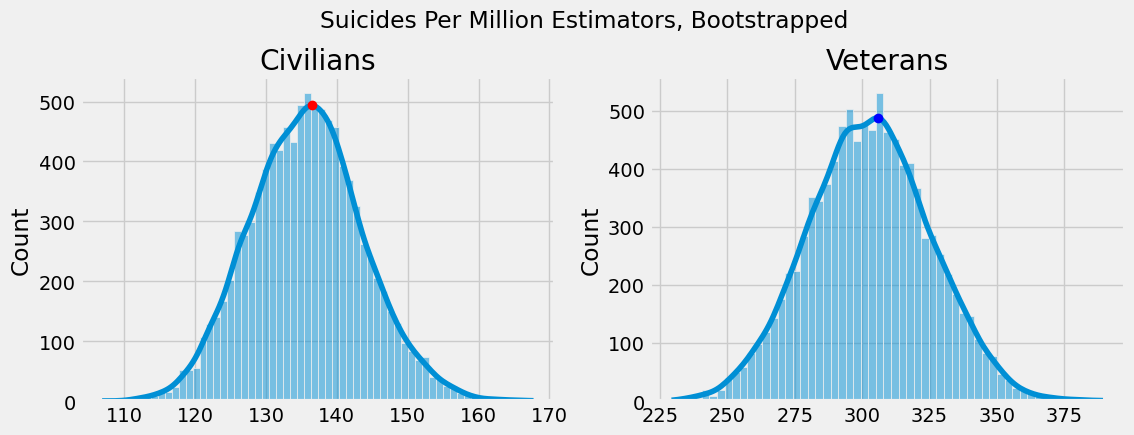

In [260]:
plt.style.use('fivethirtyeight')
fix, axarr = plt.subplots(1, 2, figsize=(12,4))
plt.suptitle("Suicides Per Million Estimators, Bootstrapped").set_position([.5, 1.05])

sns.histplot(pd.Series(nonvet_means), ax= axarr[0], kde=True)
axarr[0].set_title("Civilians")
axarr[0].plot(x_max, y_max, 'ro')

sns.histplot(pd.Series(vet_means), ax= axarr[1], kde=True)
axarr[1].plot(x_max_vet, y_max_vet, 'bo')
axarr[1].set_title("Veterans")

plt.show();

In [261]:
# Confidence Interval

years = range(2005, 2012)
test_data = []
for year in years:
    a = pd.read_csv(f"./us_veteran_data/{year}.csv", index_col=0)
    vet_suic = (
    a
    .assign(
        rate_vet = lambda df: df.vet_suicides / df.vet_pop,
        rate_nonvet = lambda df: (df.all_suicides - df.vet_suicides)/ df.overall_pop_18
        
    )
    .select_columns("state", "rate_nonvet", "rate_vet")
)
    test_data.append(
        {
            "civ": confidence_interval(vet_suic.rate_nonvet, 0.95),
            "vet": confidence_interval(vet_suic.rate_vet, 0.95)
        })

In [262]:
test_data

[{'civ': array([0.00012587, 0.00014565]),
  'vet': array([0.00027422, 0.00033108])},
 {'civ': array([0.00012557, 0.00014541]),
  'vet': array([0.00026315, 0.00031789])},
 {'civ': array([0.00012811, 0.0001466 ]),
  'vet': array([0.00028344, 0.00034289])},
 {'civ': array([0.00013269, 0.00015423]),
  'vet': array([0.00029918, 0.0003574 ])},
 {'civ': array([0.00013432, 0.00015394]),
  'vet': array([0.00031193, 0.00037223])},
 {'civ': array([0.00014122, 0.00016139]),
  'vet': array([0.00032349, 0.00038442])},
 {'civ': array([0.00013979, 0.00015989]),
  'vet': array([0.00032968, 0.00038409])}]

In [263]:
nonvet_means_t = [np.mean(c['civ'])*1e6 for c in test_data] #This is a mean obtained from 0.95 CI for non veterans or civilians suicide rate through time.
vet_means_t = [np.mean(c['vet'])*1e6 for c in test_data] #This is a mean obtained from 0.95 CI for veterans suicide rate through time.

nonvet_mins_t = [c['civ'][0]*1e6 for c in test_data]
vet_mins_t = [c['vet'][0]*1e6 for c in test_data]

nonvet_maxs_t = [c['civ'][1]*1e6 for c in test_data]
vet_maxs_t = [c['vet'][1]*1e6 for c in test_data]

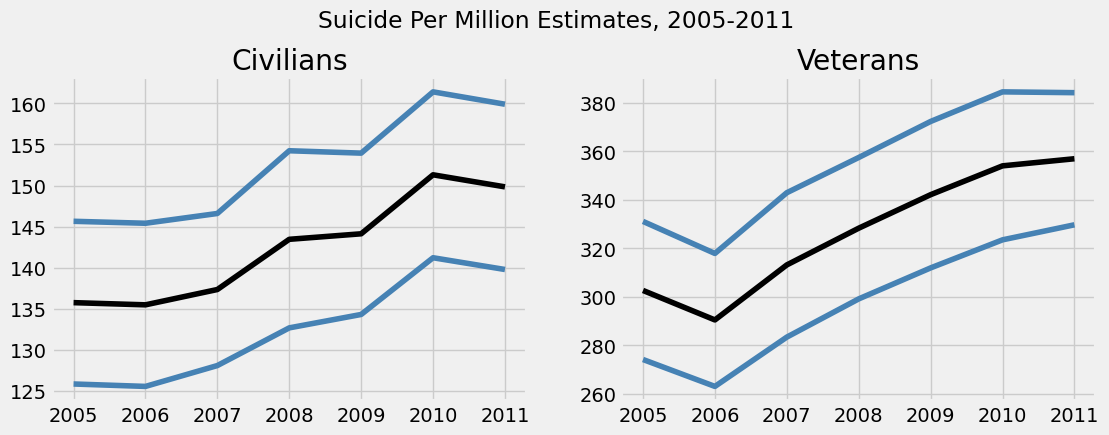

In [264]:
ind = pd.Index(range(2005, 2012))
fig, axarr = plt.subplots(1, 2, figsize=(12,4))
plt.suptitle("Suicide Per Million Estimates, 2005-2011").set_position([.5, 1.05])

pd.Series(nonvet_means_t, index=ind).plot.line(color='black', ax=axarr[0])
pd.Series(nonvet_mins_t, index=ind).plot.line(color='steelblue', ax=axarr[0])
pd.Series(nonvet_maxs_t, index=ind).plot.line(color='steelblue', ax=axarr[0])
axarr[0].set_title("Civilians")

pd.Series(vet_means_t, index=ind).plot.line(color='black', ax=axarr[1])
pd.Series(vet_mins_t, index=ind).plot.line(color='steelblue', ax=axarr[1])
pd.Series(vet_maxs_t, index=ind).plot.line(color='steelblue', ax=axarr[1])
axarr[1].set_title("Veterans")
plt.plot();

---

### Cross-validation

In [265]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data/

breast-cancer-wisconsin-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [266]:
zip_file_path = 'breast-cancer-wisconsin-data.zip'
wisc_extracted_dir_path = 'breast-cancer-wisconsin'
os.makedirs(wisc_extracted_dir_path, exist_ok=True)

In [267]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(wisc_extracted_dir_path)

In [268]:
breastcanc_df = pd.read_csv('./breast-cancer-wisconsin/data.csv')
breastcanc_df.drop(columns='Unnamed: 32', axis=1, inplace=True)
breastcanc_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [269]:
X = breastcanc_df.iloc[:, 2:]
Y = breastcanc_df.iloc[:, 1]

In [270]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [271]:
Y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [272]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [273]:
#Training model using Decision Trees
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=4)
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print(result)

0.8888888888888888


In [274]:
# K-fold cross-validation
from sklearn.model_selection import KFold

model = DecisionTreeClassifier()
kfold_validation = KFold(10)

In [275]:
from sklearn.model_selection import cross_val_score
results = cross_val_score(model, X, Y, cv= kfold_validation)
print(results)
results.mean()

[0.9122807  0.9122807  0.89473684 0.9122807  0.9122807  0.96491228
 0.89473684 0.96491228 0.9122807  0.94642857]


0.9227130325814535